In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
from scipy.ndimage.filters import gaussian_filter
from astropy.io import fits
from astropy.wcs import WCS
import healpy as hp
import reproject

In [3]:
from __future__ import unicode_literals

figsize(8,6)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 12
rcParams['legend.borderaxespad'] = 2

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

In [4]:
lonc = 107.2
latc = 5.2
lonra = [105.6, 108.8]
latra = [3.6, 6.8]
d2r = np.pi / 180.

In [5]:
bankA = hp.read_map('GBT_destriped_bankA_healpix.fits')

NSIDE = 4096
ORDERING = RING in fits file


/home/mabitbol/.local/lib/python2.7/site-packages/healpy/pixelfunc.py:249: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


In [6]:
bankB = hp.read_map('GBT_destriped_bankB_healpix.fits')

NSIDE = 4096
ORDERING = RING in fits file


In [7]:
bankC = hp.read_map('GBT_destriped_bankC_healpix.fits')

NSIDE = 4096
ORDERING = RING in fits file


In [8]:
nside = hp.get_nside(bankA)
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, (45./60.)*d2r)
amaskout = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
amaskin = set(hp.query_disc(nside, vecc, (60./60.)*d2r))
amask = np.array(list(amaskout.difference(amaskin)))

In [26]:
xdata = bankC * 1e-6
xdata -= np.nanmedian(xdata[amask])

In [27]:
x = hp.cartview(xdata, lonra=lonra, latra=latra, return_projected_map=True, flip='geo')
fig = gcf()
ax = fig.axes[0]
img = ax.images[0]
X = np.linspace(img.get_extent()[0], img.get_extent()[1], 800)
Y = np.linspace(img.get_extent()[2], img.get_extent()[3], 800)
close()

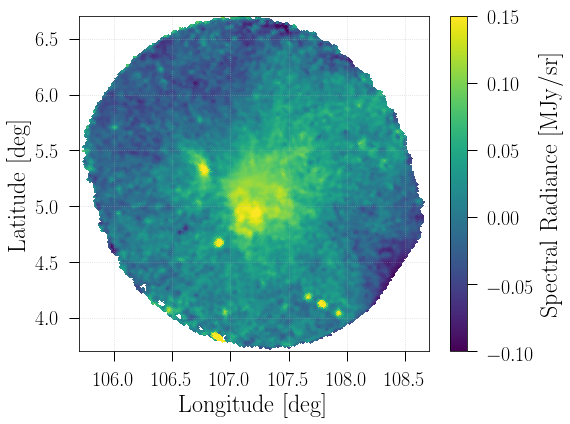

In [28]:
pc = pcolormesh(X, Y, x.data, rasterized=True)
clim(-0.1, 0.15)
cm = colorbar();
cm.set_label('$\mathrm{Spectral\ Radiance\ [MJy / sr]}$')

xlim(lonra)
ylim(latra)
xlabel('$\mathrm{Longitude\ [deg]}$')
ylabel('$\mathrm{Latitude\ [deg]}$')
grid(ls='dotted', alpha=0.5)
xlim(105.7, 108.7)
ylim(3.7, 6.7)
xticks([106, 106.5, 107, 107.5, 108, 108.5]);
tight_layout()
savefig('../notebooks/GBT_bankC_destriped_deplaned.pdf', format='pdf', dpi=300)

In [12]:
rdmesh = meshgrid(X, Y)
radius_grid = np.sqrt( (rdmesh[0] - lonc)**2 + (rdmesh[1] - latc)**2 ) 

In [13]:
rads = radius_grid.flatten()
fluxs = x.data.flatten()
mask = np.isnan(fluxs)
fluxs = fluxs[~mask]
rads = rads[~mask]

mask2 = rads <= (90./60.)
fluxs = fluxs[mask2]
rads = rads[mask2]

In [14]:
histo, bins = np.histogram(rads, bins=45, weights=fluxs)

In [15]:
histnorm, bins2 = np.histogram(rads, bins=45)

In [16]:
bins = (bins[1:] + bins[:-1])/2.

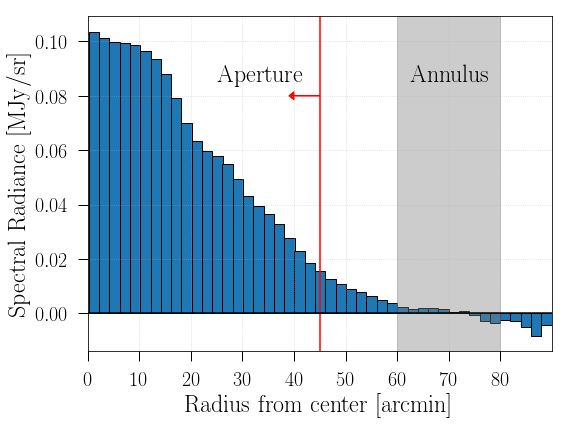

In [19]:
bar(x=bins * 60., height=histo/histnorm, width=2., edgecolor='k')
grid(ls='dotted', alpha=0.5)
xlabel('$\mathrm{Radius\ from\ center\ [arcmin]}$')
ylabel('$\mathrm{Spectral\ Radiance\ [MJy/sr]}$')
xticks(np.linspace(0, 80, 9));
axvspan(60, 80, color='grey', alpha=0.4)
axvline(45, color='r')
arrow(45, 0.08, -6, 0, color='r', head_width=0.003, head_length=1, width=0.0001, length_includes_head=True)
xlim(0, 90)
axhline(0, color='k')
text(62.5, 0.085, '$\mathrm{Annulus}$', fontsize=24)
text(25, 0.085, '$\mathrm{Aperture}$', fontsize=24)
tight_layout()
savefig('flux_radius_binned_destriped_deplaned_bankA.pdf', format='pdf')